## Using and Creating iPSC-CM Protocols

The purpose of this file is to provide background the protocols that are present in this directory, how to use them, and how to add new ones.

At the time of writing this (11/26/19), there are four protocols. Their behaviors are described in the following three classes:
- `SingleActionPotentialProtocol()`
- `IrregularPacingProtocol()`
- `VoltageClampStep()`
- `VoltageClampProtocol()`

We created these protocols as their own class, because you may want multiple instances of these protocols in the same program (e.g. for voltage clamp optimizations)

You can find these protocols in **./protocols.py**. Let's take a look at how to import and run each w/ the Kernik Model.


#### Single Action Potential

In [14]:
%matplotlib inline

from kernik import KernikModel
import protocols
import matplotlib.pyplot as plt

The SingleActionPotentialProtocol() class name is a misnomer. It should be called SpontaneousProtocol(). You initialize the protocol with an value for the following parameter:
- `duration`: float – the amount of time you want the model to run spontaneously.

In [15]:
DURATION = 983  # Length of Kernik AP, in milliseconds
SAP_PROTOCOL_KERNIK = protocols.SingleActionPotentialProtocol(DURATION)

At this point, you should take a moment to look in **./protocols.py**. Find the `SingleActionPotentialProtocol()` class, and try to understand the **behavior** and **state** of the value saved to `kernik_protocol`. The only information saved to this instance is a time duration.

Next, we can run a single AP with the following:

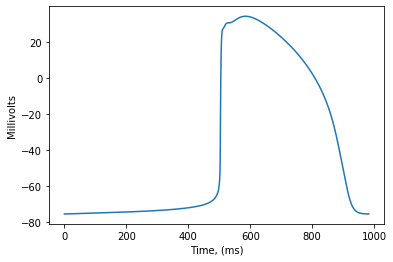

In [16]:
baseline_kernik = KernikModel() # Initialize the baseline kernik individual
baseline_kernik.generate_response(SAP_PROTOCOL_KERNIK) # Run model
baseline_kernik.generate_response(SAP_PROTOCOL_KERNIK)

plt.plot(baseline_kernik.t, baseline_kernik.y_voltage)
plt.xlabel("Time, (ms)")
plt.ylabel("Millivolts")
plt.show()

Before you move onto another protocol, let's consider what happens when we call: 
```py
baseline_kernik.generate_response(SAP_PROTOCOL_KERNIK)
```

Let's follow the bread crumbs, so to speak:
1. If you open `kernik.py`, you may notice that there is no `.generate_response()` method defined. In fact, the class only contains two methods: `.__init__()` and `action_potential_diff_eq()`. These methods describe model-specific formulations and state values. This is because, _all cardiac model behavior is inherited from the `CellModel()` class in **cell\_model.py** file._
2. Navigate to the `CellModel()` class in **cell_model.py**. 
